In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.metrics import f1_score

In [3]:
#used for confusion matrix
from sklearn import metrics

In [4]:
digits = load_digits()

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

### Show Images and Labels

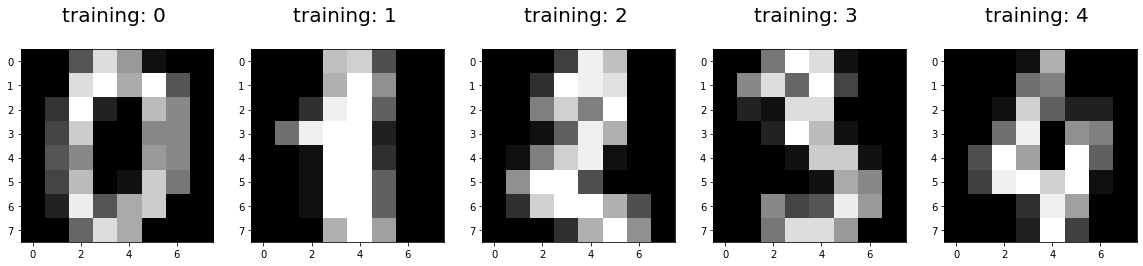

In [7]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap = plt.cm.gray)
    plt.title('training: %i \n' % label, fontsize = 20)

In [8]:
#test_size: what proportion of original date is used for test set
x_train, x_test, y_train, y_test = train_test_split(
digits.data, digits.target, test_size = 0.20, random_state = 0)

In [9]:
print(x_train.shape)

(1437, 64)


In [10]:
print(y_train.shape)

(1437,)


In [11]:
print(x_test.shape)

(360, 64)


In [12]:
print(y_test.shape)

(360,)


In [13]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

### Random Forests Classifier

In [14]:
rfc=RandomForestClassifier(n_jobs=-1,random_state=51)

In [15]:
rfc.fit(x_train,y_train)
pred=rfc.predict(x_test)
rfc.score(x_test,y_test)

C:\Users\ZAND\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.95

In [16]:
print(rfc.score(x_test,y_test))
print(f1_score(y_test,rfc.predict(x_test),average='macro'))

0.95
0.9502713692696053


Text(0, 0.5, 'Prediction Accuracy')

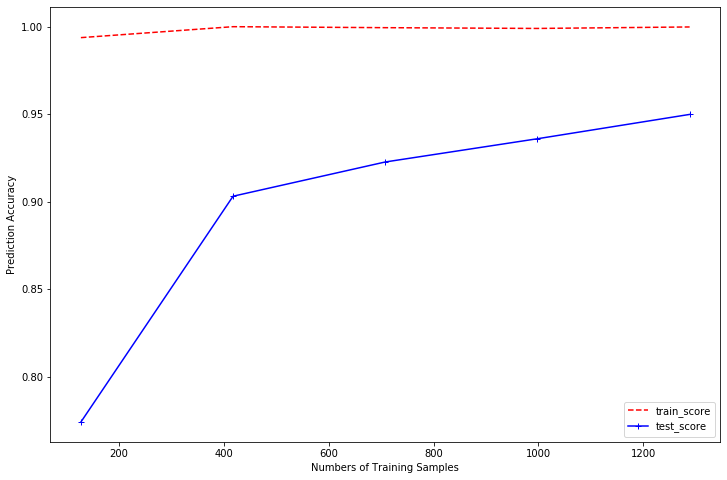

In [17]:
lc=learning_curve(rfc,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

So, the basic model of RFC is giving 95% accuracy.

Now, check the effect of n_estimators on the model

Text(0, 0.5, 'Performance metric')

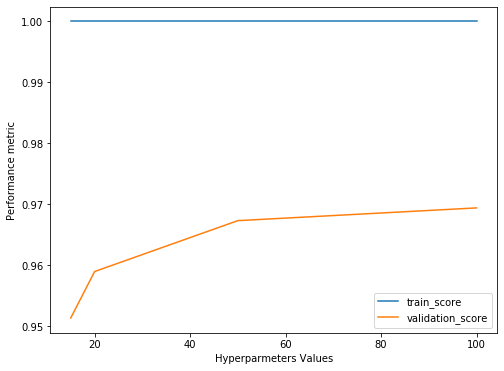

In [18]:
param_range=[15, 20,50,100]
curve=validation_curve(rfc,x_train,y_train,cv=5,param_name='n_estimators',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [19]:
rfc.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 51,
 'verbose': 0,
 'warm_start': False}

So, with the increasing n_estimators, test accuracy is increasing. Model is evaluating best at n_estimators=25. After n_estimators=25,model starts overfitting. Now, we've reached approx. 96.3% accuracy.

We can also check of other parameters like 'max_depth','criterion',etc using above code.
Another simple way is to use GridSearch to get combination of best parameters. As this dataset is small, GridSearch will take less time to complete.


In [20]:
param_grid={'criterion':['gini','entropy'],
           'max_depth':[2,5,10,20],
           'max_features':[2,4,6,'auto'],
           'max_leaf_nodes':[2,3,None],}

In [21]:
grid=GridSearchCV(estimator=RandomForestClassifier(n_estimators=50,n_jobs=-1,random_state=51),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [22]:
grid.fit(x_train,y_train)

C:\Users\ZAND\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=50, n_jobs=-1,
                                              oob_score=False, random_state=51,
                                              verbose=0, warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'criteri

In [23]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        27
           1       0.92      0.97      0.94        35
           2       0.97      0.97      0.97        36
           3       0.94      1.00      0.97        29
           4       0.94      0.97      0.95        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       0.95      1.00      0.97        39
           8       0.94      0.85      0.89        39
           9       0.95      0.88      0.91        41

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



### Logistic Regression

In [24]:
logreg=LogisticRegression(solver='newton-cg',multi_class='multinomial', n_jobs=-1,random_state=51)

In [25]:
logreg.fit(x_train,y_train)
pred=logreg.predict(x_test)
logreg.score(x_test,y_test)

0.9583333333333334

In [26]:
print(logreg.score(x_test,y_test))
print(f1_score(y_test,logreg.predict(x_test),average='macro'))

0.9583333333333334
0.9602082366346595


So, basic logistic regression model is giving very less accuracy. Let's check the learning curves

Text(0, 0.5, 'Prediction Accuracy')

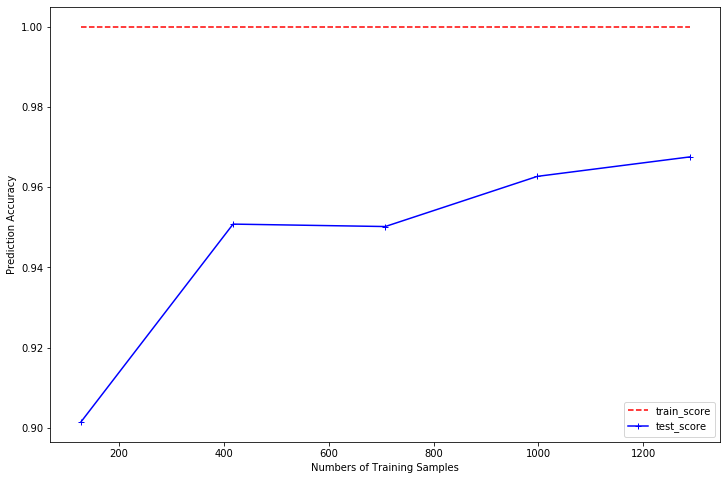

In [27]:
lc=learning_curve(logreg,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

In [28]:
curve

(array([[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1.]]),
 array([[0.93493151, 0.96539792, 0.96503497, 0.94405594, 0.9471831 ],
        [0.95547945, 0.96193772, 0.97202797, 0.95104895, 0.95422535],
        [0.96917808, 0.95847751, 0.98251748, 0.96153846, 0.96478873],
        [0.97260274, 0.96193772, 0.97902098, 0.95804196, 0.97535211]]))

Text(0, 0.5, 'Performance metric')

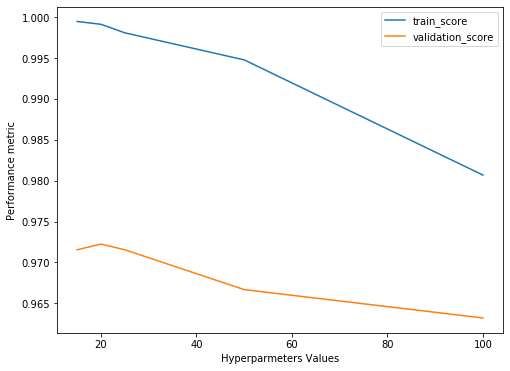

In [54]:
param_range=[15,20,25,50,100]
curve=validation_curve(logreg,x_train,y_train,cv=5,param_name='tol',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [30]:
logreg.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'multinomial',
 'n_jobs': -1,
 'penalty': 'l2',
 'random_state': 51,
 'solver': 'newton-cg',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}


Now, as it is a multiclass classification, I tired using 'newton-cg','sag','lgfbs' solvers.

As this dataset is smaller, we can use GridSearch to get best possible parameters

In [31]:
param_grid={'C':[0.01,0.1,3,10],
           'solver':['newton-cg', 'lbfgs', 'sag'],
           'multi_class':['multinomial']}

In [32]:
grid=GridSearchCV(estimator=LogisticRegression(n_jobs=-1),param_grid=param_grid,cv=5,n_jobs=-1)

In [33]:
grid.fit(x_train,y_train)

C:\Users\ZAND\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 3, 10],
                         'multi_class': ['multinomial'],
                         'solver': ['newton-cg', 'lbfgs', 'sag']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.91      0.89      0.90        35
           2       0.97      0.97      0.97        36
           3       0.97      1.00      0.98        29
           4       0.97      1.00      0.98        30
           5       0.97      0.93      0.95        40
           6       0.98      0.98      0.98        44
           7       1.00      0.97      0.99        39
           8       0.92      0.92      0.92        39
           9       0.91      0.95      0.93        41

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.96      0.96      0.96       360



### KNN Classifier
As logistic regression didn't give accuracy, I tried KNN classification

In [35]:
knn=KNeighborsClassifier(n_jobs=-1)

In [36]:
knn.fit(x_train,y_train)
pred=knn.predict(x_test)
knn.score(x_test,y_test)

0.975

In [37]:
print(knn.score(x_test,y_test))
print(f1_score(y_test,knn.predict(x_test),average='macro'))

0.975
0.9750733248981561


So, the default KNN classificaton model is giving an accuracy of 97.5%

Text(0, 0.5, 'Prediction Accuracy')

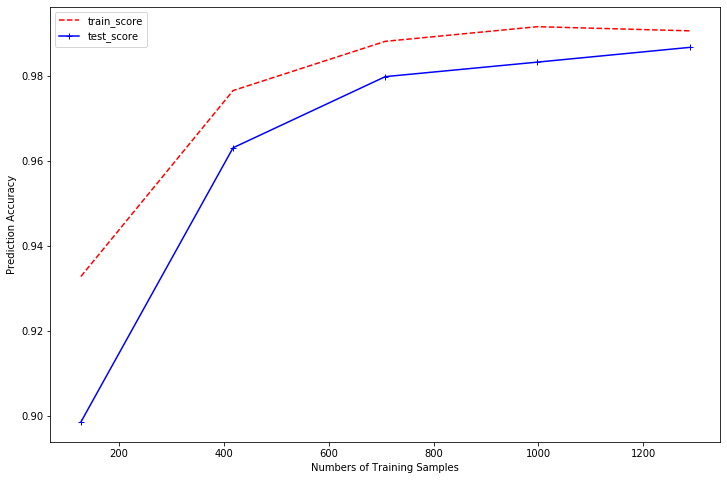

In [38]:
lc=learning_curve(knn,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

In [39]:
curve

(array([[1.        , 0.99912892, 1.        , 0.99826238, 1.        ],
        [1.        , 0.99912892, 1.        , 0.99826238, 0.99826539],
        [1.        , 0.99912892, 0.99478714, 0.99826238, 0.99826539],
        [0.9930131 , 0.99303136, 0.99478714, 0.99478714, 0.99826539],
        [0.9790393 , 0.97735192, 0.98436142, 0.981755  , 0.98091934]]),
 array([[0.95547945, 0.97577855, 0.97202797, 0.97202797, 0.98239437],
        [0.95547945, 0.97577855, 0.97202797, 0.97202797, 0.98591549],
        [0.95547945, 0.97577855, 0.96853147, 0.97202797, 0.98591549],
        [0.95547945, 0.96539792, 0.96853147, 0.95804196, 0.98591549],
        [0.94863014, 0.96193772, 0.96153846, 0.96503497, 0.97887324]]))

Text(0, 0.5, 'Performance metric')

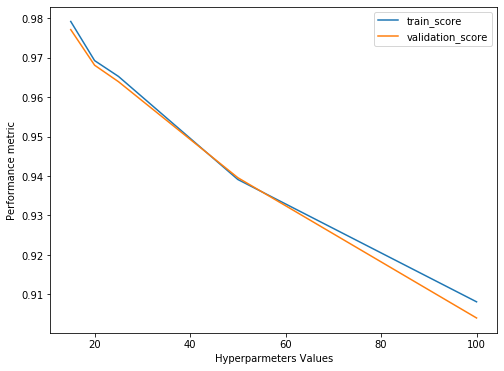

In [55]:
param_range=[15,20,25,50,100]
curve=validation_curve(knn,x_train,y_train,cv=5,param_name='n_neighbors',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [41]:
param_grid={'algorithm':['auto'],
'leaf_size':[30],
'metric':['minkowski'], 
'metric_params':[None],
'n_jobs':[None],
'n_neighbors':[5],
'p':[2],
'weights':['uniform']}


In [42]:
grid=GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=50,n_jobs=-1),
                  param_grid=param_grid,cv=10,n_jobs=-1)

In [43]:
grid.fit(x_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=-1,
                                            n_neighbors=50, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=-1,
             param_grid={'algorithm': ['auto'], 'leaf_size': [30],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [None], 'n_neighbors': [5], 'p': [2],
                         'weights': ['uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

Now I checked for various parameters for 'n_neighbours'. I can visualize the effect of n_neighbours.

In [85]:
avg_score=[]
for k in range(1,10):
    knn=KNeighborsClassifier(n_jobs=-1,n_neighbors=k)
    score=cross_val_score(knn,x_train,y_train,cv=3,n_jobs=-1,scoring='accuracy')
    avg_score.append(score.mean())

Text(0, 0.5, 'accuracy')

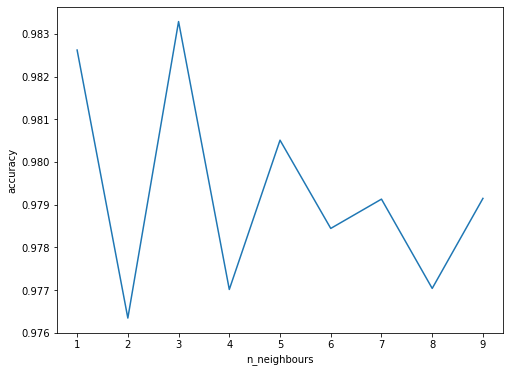

In [86]:
# plot the relationship between K and testing accuracy
plt.figure(figsize=(8,6))
plt.plot(range(1,10),avg_score)
plt.xlabel("n_neighbours")
plt.ylabel("accuracy")
#plt.xticks(range(2,30,2))

So, n_neighbours=3 is giving better accuracy as well as f1-score for our data.

So, with KNN Classification algorithm, we are able to achieve accuracy around 97%

In [46]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.97      0.97      0.97        35
           2       1.00      0.97      0.99        36
           3       0.91      1.00      0.95        29
           4       1.00      0.97      0.98        30
           5       0.95      0.97      0.96        40
           6       1.00      1.00      1.00        44
           7       0.95      1.00      0.97        39
           8       1.00      0.90      0.95        39
           9       0.98      0.98      0.98        41

    accuracy                           0.97       360
   macro avg       0.98      0.98      0.98       360
weighted avg       0.98      0.97      0.97       360



## SVM

In [47]:
classifier = svm.LinearSVC (random_state=51)

In [48]:
classifier.fit(x_train,y_train)
pred=classifier.predict(x_test)
classifier.score(x_test,y_test)

C:\Users\ZAND\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.9361111111111111

In [49]:
print(classifier.score(x_test,y_test))
print(f1_score(y_test,classifier.predict(x_test),average='macro'))

0.9361111111111111
0.9374254040784749


Text(0, 0.5, 'Prediction Accuracy')

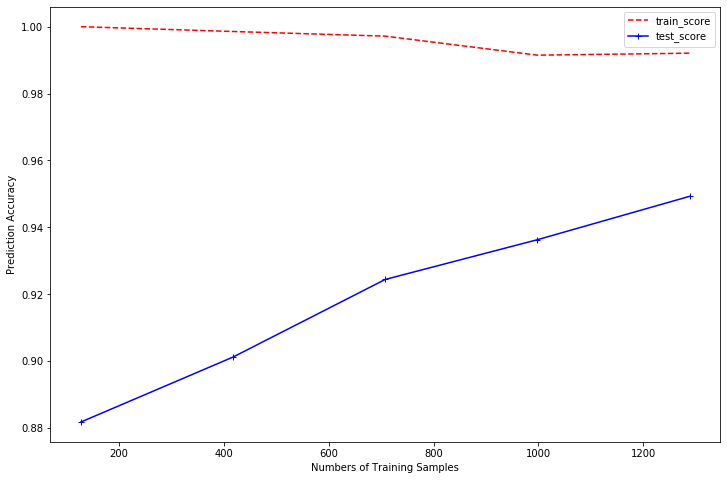

In [50]:
lc=learning_curve(classifier,x_train,y_train,cv=10,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score, "r--" ,label="train_score")
plt.plot(size,test_score,"b+-" , label="test_score")
plt.legend(loc="best")
plt.xlabel("Numbers of Training Samples")
plt.ylabel("Prediction Accuracy")

In [51]:
curve

(array([[0.97991266, 0.98083624, 0.97654214, 0.97914857, 0.97918474],
        [0.9720524 , 0.97299652, 0.96524761, 0.96959166, 0.9661752 ],
        [0.9650655 , 0.97038328, 0.96524761, 0.96350999, 0.96183868],
        [0.94672489, 0.93554007, 0.93657689, 0.94265856, 0.934085  ],
        [0.91179039, 0.90592334, 0.90443093, 0.9105126 , 0.90806592]]),
 array([[0.97260274, 0.97577855, 0.98601399, 0.96853147, 0.98239437],
        [0.95890411, 0.96539792, 0.97202797, 0.96503497, 0.97887324],
        [0.95205479, 0.96539792, 0.96853147, 0.95804196, 0.97535211],
        [0.91780822, 0.94463668, 0.95454545, 0.91608392, 0.96478873],
        [0.8869863 , 0.90311419, 0.92657343, 0.88811189, 0.91549296]]))

Text(0, 0.5, 'Performance metric')

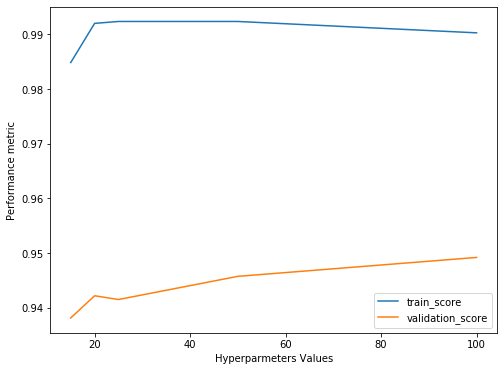

In [56]:
param_range=[15,20,25,50,100]
curve=validation_curve(classifier,x_train,y_train,cv=5,param_name='C',
    param_range=param_range,n_jobs=-1)

train_score=[curve[0][i].mean() for i in range (0,len(param_range))]
test_score=[curve[1][i].mean() for i in range (0,len(param_range))]
fig=plt.figure(figsize=(8,6))
plt.plot(param_range,train_score, label="train_score")
plt.plot(param_range,test_score, label="validation_score")
plt.legend(loc="best")
plt.xticks=param_range
plt.xlabel("Hyperparmeters Values")
plt.ylabel("Performance metric")

In [53]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        27
           1       0.90      0.77      0.83        35
           2       0.97      0.92      0.94        36
           3       0.90      0.97      0.93        29
           4       0.97      1.00      0.98        30
           5       0.95      0.95      0.95        40
           6       0.96      0.98      0.97        44
           7       1.00      0.95      0.97        39
           8       0.84      0.92      0.88        39
           9       0.90      0.93      0.92        41

    accuracy                           0.94       360
   macro avg       0.94      0.94      0.94       360
weighted avg       0.94      0.94      0.94       360

